# Block 7 Workshop 07.3: Tensorflow and Keras 

```
date: "Block 07"
author: "Daniel Lawson"
email: dan.lawson@bristol.ac.uk
output: html_document
version: 2.0.0
```

This is a very simple example of a working neural network approach.

# 0. Prerequisites: Tensorflow/Keras setup

We first need to install tensorflow and keras (as well as requests to load data).

**Important note**: To get Keras to use your GPU (and hence run fast if you have a good one), you have to do more than this. We explore that separately...

In [1]:
# !pip install keras matplotlib numpy pandas Requests scikit_learn tensorflow

There are also some **optional** packages, that are potentially harder to install. These are explained as wel use them.

The first is to install tensorflow that can use the GPU. **Warning**: this is dependent on a lot of details of your system and is only possible for some GPUs on some systems. 

I've put my hardware's instructions below; you'll need to get it working on Windows (or Linux) you'll need different instructions. These are at:

https://www.tensorflow.org/install/pip#windows-native

**IMPORTANT NOTE**: You don't need to install these packages to use tensorflow. It will just run on your CPU. This is slower, but appropriate for learning.

In [2]:
## For macos only:
#!pip install tensorflow-macos
#!pip install tensorflow-metal

## For windows (possibly):
## !conda install -y -c conda-forge cudatoolkit=11.2 cudnn=8.1.0
# Anything above 2.10 is not supported on the GPU on Windows Native
## !pip install "tensorflow<2.11"

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
#!pip install pipreqsnb
!pipreqsnb --savepath requirements-block07.txt block07-NeuralNetworks.ipynb

pipreqs  --savepath requirements-block07.txt /Users/madjl/teach/dst-private/Workshops/__temp_pipreqsnb_folder
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in requirements-block07.txt


In [5]:
print("\nREQUIREMENTS:\n")
with open('requirements-block07.txt', 'r') as f:
    print(f.read())


REQUIREMENTS:

graphviz==0.20.1
keras==2.14.0
matplotlib==3.6.0
numpy==1.24.4
pandas==1.5.0
pydot==1.4.2
Requests==2.31.0
scikit_learn==1.1.3
tensorflow==2.10.0
tensorflow_macos==2.14.0



In [6]:
file = open('requirements-block07.txt','r')
reqlist = file.readlines()
simple= [x.split("==")[0] for x in reqlist]
print ("To install current versions, run:")
"!pip install " +" ".join(simple) 

To install current versions, run:


'!pip install graphviz keras matplotlib numpy pandas pydot Requests scikit_learn tensorflow tensorflow_macos'

As you see, its telling you to install my packages - which is probably wrong for you. So use the package list at the top of the workshop.

# 1. Practical reference

The setup procedure is borrowed from:

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

We first import the functions that we need:


In [7]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
# fix random seed for reproducibility
np.random.seed(7)

1. Simple neural network on a simple dataset

Start with the Pima Indians onset of diabetes dataset. This is a standard machine learning dataset from the UCI Machine Learning repository. It describes patient medical record data for Pima Indians and whether they had an onset of diabetes within five years.

As such, it is a binary classification problem (onset of diabetes as 1 or not as 0). All of the input variables that describe each patient are numerical. This makes it easy to use directly with neural networks that expect numerical input and output values, and ideal for our first neural network in Keras.

* [Diabetes data](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv)
* [Diabetes column names](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names)

## 1.1 Obtaining the Pima Indians Diabetes data


Download the dataset and place it in an appropriate data directory, and update the path below to reflect this.


In [8]:
import requests
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv?raw=true'
r = requests.get(url, allow_redirects=True)
open('../data/pima-indians-diabetes.data.csv', 'wb').write(r.content)

23278

In [9]:
# load pima indians dataset
dataset = np.loadtxt("../data/pima-indians-diabetes.data.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [10]:
dataset.shape

(768, 9)

In [11]:
X[0,:]

array([  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
        50.   ])

If you are having trouble navigating your file system, the following can help:

## 1.2 Defining a model

Models in Keras are defined as a sequence of layers.

We create a Sequential model and add layers one at a time until we are happy with our network topology.

The first thing to get right is to ensure the input layer has the right number of inputs. This can be specified when creating the first layer with the input_dim argument and setting it to 8 for the 8 input variables.

How do we know the number of layers and their types?

This is a very hard question. There are heuristics that we can use and often the best network structure is found through a process of trial and error experimentation. Generally, you need a network large enough to capture the structure of the problem.

In this example, we will use a fully-connected network structure with three layers.

Fully connected layers are defined using the Dense class. We can specify the number of neurons in the layer as the first argument, the initialization method as the second argument as init and specify the activation function using the activation argument.

In this case, we initialize the network weights to a small random number generated from a uniform distribution (‘uniform‘), in this case between 0 and 0.05 because that is the default uniform weight initialization in Keras. Another traditional alternative would be ‘normal’ for small random numbers generated from a Gaussian distribution.

We will use the rectifier (‘relu‘) activation function on the first two layers and the sigmoid function in the output layer. It used to be the case that sigmoid and tanh activation functions were preferred for all layers. These days, better performance is achieved using the rectifier activation function. We use a sigmoid on the output layer to ensure our network output is between 0 and 1 and easy to map to either a probability of class 1 or snap to a hard classification of either class with a default threshold of 0.5.

We can piece it all together by adding each layer. The first layer has 12 neurons and expects 8 input variables. The second hidden layer has 8 neurons and finally, the output layer has 1 neuron to predict the class (onset of diabetes or not).

In [12]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

2023-11-01 10:14:11.311445: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-01 10:14:11.311481: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-01 10:14:11.311496: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-01 10:14:11.311736: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-01 10:14:11.312045: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Compiling the model

Now that the model is defined, we can compile it.

Compiling the model uses the efficient numerical libraries under the covers (the so-called backend) such as Theano or TensorFlow. The backend automatically chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU or GPU or even distributed.

When compiling, we must specify some additional properties required when training the network. Remember training a network means finding the best set of weights to make predictions for this problem.

We must specify the loss function to use to evaluate a set of weights, the optimizer used to search through different weights for the network and any optional metrics we would like to collect and report during training.

In this case, we will use logarithmic loss, which for a binary classification problem is defined in Keras as “binary_crossentropy“. We will also use the efficient gradient descent algorithm “adam” for no other reason that it is an efficient default. Learn more about the Adam optimization algorithm in the paper “Adam: A Method for Stochastic Optimization“.

Finally, because it is a classification problem, we will collect and report the classification accuracy as the metric.

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Model fitting

We have defined our model and compiled it ready for efficient computation.

Now it is time to execute the model on some data.

We can train or fit our model on our loaded data by calling the fit() function on the model.

The training process will run for a fixed number of iterations through the dataset called epochs, that we must specify using the nepochs argument. We can also set the number of instances that are evaluated before a weight update in the network is performed, called the batch size and set using the batch_size argument.

For this problem, we will run for a small number of iterations (150) and use a relatively small batch size of 10. Again, these can be chosen experimentally by trial and error.

In [14]:
model.fit(X, Y, epochs=150, batch_size=10)

Epoch 1/150


2023-11-01 10:14:12.258592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 3s 10ms/step - loss: 8.9702 - accuracy: 0.4427
Epoch 2/150
77/77 [==============================] - 0s 6ms/step - loss: 6.2417 - accuracy: 0.3737
Epoch 3/150
77/77 [==============================] - 0s 6ms/step - loss: 4.9010 - accuracy: 0.3945
Epoch 4/150
77/77 [==============================] - 0s 5ms/step - loss: 3.1980 - accuracy: 0.4505
Epoch 5/150
77/77 [==============================] - 0s 6ms/step - loss: 2.0772 - accuracy: 0.4661
Epoch 6/150
77/77 [==============================] - 0s 6ms/step - loss: 1.6868 - accuracy: 0.5404
Epoch 7/150
77/77 [==============================] - 0s 6ms/step - loss: 1.3524 - accuracy: 0.5430
Epoch 8/150
77/77 [==============================] - 0s 5ms/step - loss: 1.1714 - accuracy: 0.5677
Epoch 9/150
77/77 [==============================] - 0s 6ms/step - loss: 0.9888 - accuracy: 0.5938
Epoch 10/150
77/77 [==============================] - 0s 5ms/step - loss: 0.8257 - accuracy: 0.6068
Epoch 11/150
77/77 [

77/77 [==============================] - 0s 5ms/step - loss: 0.5918 - accuracy: 0.7083
Epoch 84/150
77/77 [==============================] - 0s 5ms/step - loss: 0.6252 - accuracy: 0.6992
Epoch 85/150
77/77 [==============================] - 0s 5ms/step - loss: 0.6118 - accuracy: 0.6888
Epoch 86/150
77/77 [==============================] - 0s 5ms/step - loss: 0.6563 - accuracy: 0.6784
Epoch 87/150
77/77 [==============================] - 0s 5ms/step - loss: 0.6432 - accuracy: 0.6953
Epoch 88/150
77/77 [==============================] - 0s 5ms/step - loss: 0.5992 - accuracy: 0.7018
Epoch 89/150
77/77 [==============================] - 0s 5ms/step - loss: 0.6499 - accuracy: 0.6901
Epoch 90/150
77/77 [==============================] - 0s 5ms/step - loss: 0.6344 - accuracy: 0.7070
Epoch 91/150
77/77 [==============================] - 0s 5ms/step - loss: 0.6128 - accuracy: 0.7096
Epoch 92/150
77/77 [==============================] - 0s 5ms/step - loss: 0.6804 - accuracy: 0.6706
Epoch 93/150


## 1.3 Model evaluation

This is the **training** accuracy.

In [15]:
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

24/24 [==============================] - 0s 3ms/step - loss: 0.5437 - accuracy: 0.7500

accuracy: 75.00%


Now we'll extract the predictions and compare the direction of error.

In [16]:
predictions = model.predict(X)
rounded = [round(x[0]) for x in predictions]

24/24 [==============================] - 0s 1ms/step


In [17]:
import pandas as pd
pd.crosstab(rounded-Y,columns="Residual")

col_0,Residual
row_0,
-1.0,165
0.0,576
1.0,27


# 2.1 An image example from Keras

[Keras](https://keras.io/examples) has some excellent examples. This one on playing that age-old game "Cat or Dog?" is from https://keras.io/examples/vision/image_classification_from_scratch/.

The problem with this example is that it is very slow to run. Unless you have a GPU, and can get it working, you will be waiting a long time for this to process. I've made the images unrealistically small, and reduced the size of the neural network, so that it will still run on your laptops without a GPU.  But its still slow.

The first thing is to import the required libraries. These are not new imports, just importing the namespaces differently.

In [18]:
from tensorflow import keras
from tensorflow.keras import layers

### 2.1.1 Obtain the data

We download the **786Mb** ZIP archive of the raw data. This is a Kaggle dataset from Microsoft. it goes in the folder `PetImages` in the current directory, with two subdirectories: `Cat` and... `Dog`.

In [19]:

!curl -O h§bttps://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

curl: Failed to extract a sensible file name from the URL to use for storage!
curl: (3) URL using bad/illegal format or missing URL


In [25]:
# 
# !unzip -f -q kagglecatsanddogs_5340.zip

In [26]:
!ls PetImages

Cat Dog


### 2.1.2 Filter out corrupted images

When working with lots of real-world image data, corrupted images are a common occurence. Let's filter out badly-encoded images that do not feature the string "JFIF" in their header.

In [27]:
import os

num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("PetImages", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 0 images


### 3.1.3 Generate a Dataset

Here we will load these data into python. This does **not** read the data, but creates an interface by which the data can be read from disk when needed.

The settings below are very very small images (32 by 32 pixels). The original analysis used 160 by 160. This is necessary to make it tolerably quick. Its still very slow.

In [28]:
image_size = (32, 32) # For GPUs, making this 2^x can speed up the analysis. 32 is VERY VERY small!
batch_size = 128

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 23410 files belonging to 2 classes.
Using 18728 files for training.
Using 4682 files for validation.


### 3.1.4 Visualize the data

Here are the first 9 images in the training dataset. As you can see, label 1 is "dog" and label 0 is "cat". You can also see how blurry it is, but the cat/dog distinction is there.

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


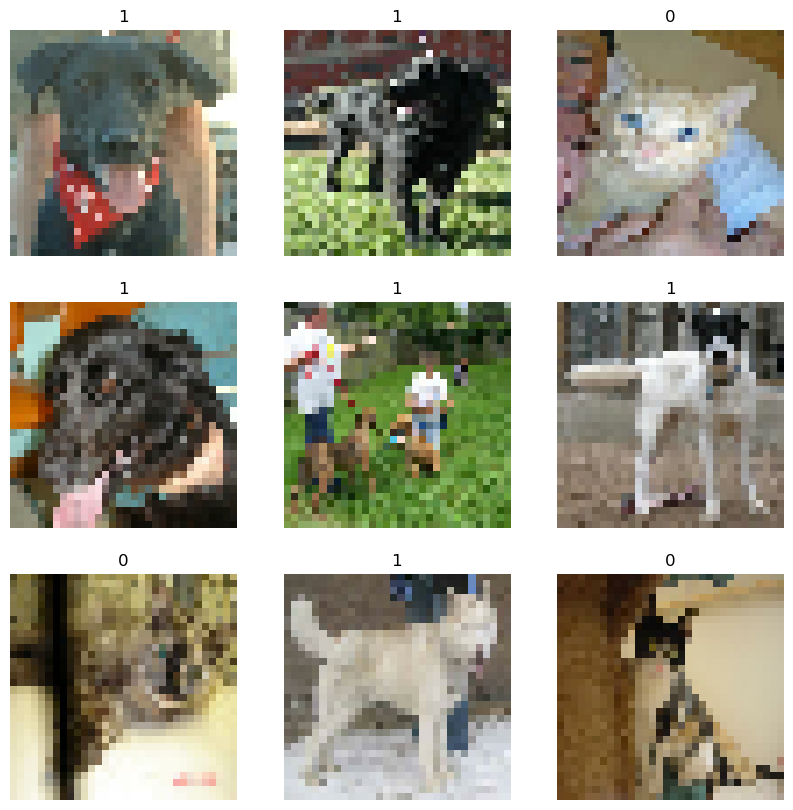

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")


### 3.1.5 Data Augmentation

The example then augments the data with more images via flipping. Examine what they do.

We will **not** do this, just to keep the processing time down. But you should do that (and more) for an assessment.


### 3.2.1 Model definition

Our image are already in a standard size (32x32), as they are being yielded as contiguous float32 batches by our dataset. However, their RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general you should seek to make your input values small. Here, we will standardize values to be in the [0, 1] by using a Rescaling layer at the start of our model.

We then apply a convolution layer, renormalise, and then add increasingly large layers (to retain all combinations of convolutions).

In [30]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [64, 128, 256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(512, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=2)


### 3.2.2 Model Visualisation

We would like to perform model visualisation.

To do this we have to install an **external** package called GraphViz. Instructions are here https://stackoverflow.com/questions/26349314/how-can-i-use-conda-to-install-pydot/50025414#50025414 and they are not easy. You can't do them from inside python with pip, but conda can install them. However, skip the following stages if you don't want to install a large amount of packages just to make a graph of the neural network.

In [31]:
!pip install pydot graphviz
!conda install -y graphviz

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.9.0



# All requested packages already installed.



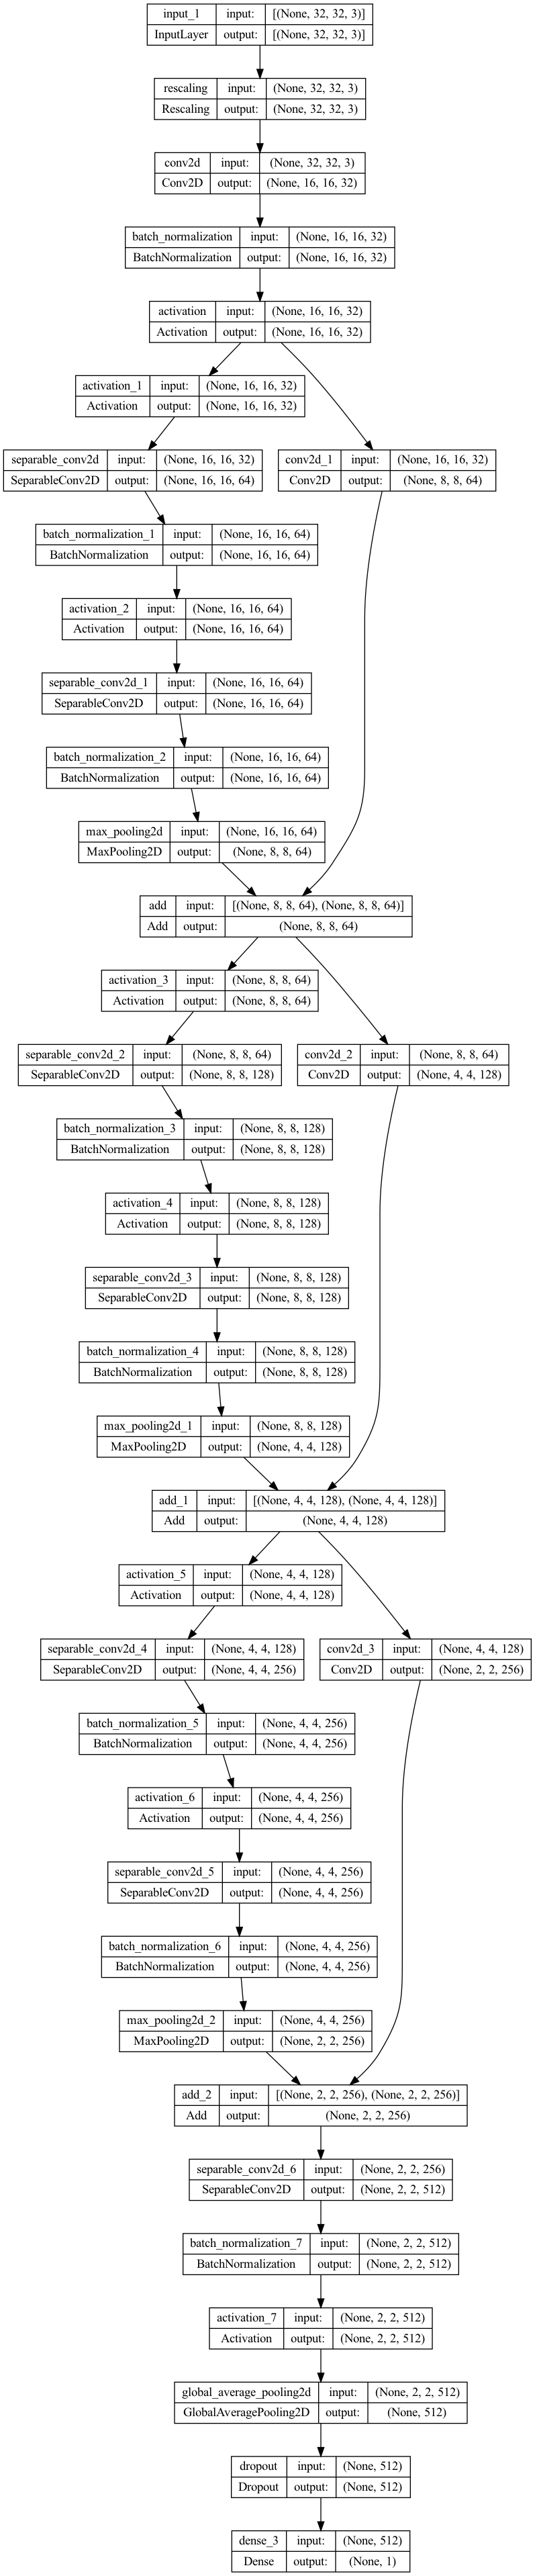

In [32]:
import pydot
import graphviz
keras.utils.plot_model(model, show_shapes=True)

### 3.2.3 Model training

We can now perform inference.This is quite straightforward compared to everything else!

In [33]:
epochs = 25

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)


Epoch 1/25


2023-11-01 10:21:28.305659: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 77/147 [==============>...............] - ETA: 6s - loss: 0.6437 - accuracy: 0.6450

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 84/147 [================>.............] - ETA: 5s - loss: 0.6408 - accuracy: 0.6490

105/147 [====================>.........] - ETA: 3s - loss: 0.6307 - accuracy: 0.6565

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


109/147 [=====================>........] - ETA: 3s - loss: 0.6286 - accuracy: 0.6576

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


147/147 [==============================] - ETA: 0s - loss: 0.6171 - accuracy: 0.6664

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 [==============================] - 23s 121ms/step - loss: 0.6171 - accuracy: 0.6664 - val_loss: 0.6966 - val_accuracy: 0.5043
Epoch 2/25


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 77/147 [==============>...............] - ETA: 6s - loss: 0.5213 - accuracy: 0.7402

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 85/147 [================>.............] - ETA: 5s - loss: 0.5192 - accuracy: 0.7409

105/147 [====================>.........] - ETA: 3s - loss: 0.5141 - accuracy: 0.7449

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


110/147 [=====================>........] - ETA: 3s - loss: 0.5140 - accuracy: 0.7443

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


146/147 [============================>.] - ETA: 0s - loss: 0.5097 - accuracy: 0.7469

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 [==============================] - 15s 98ms/step - loss: 0.5094 - accuracy: 0.7472 - val_loss: 0.7303 - val_accuracy: 0.5043
Epoch 3/25


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 78/147 [==============>...............] - ETA: 4s - loss: 0.4583 - accuracy: 0.7826

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 85/147 [================>.............] - ETA: 3s - loss: 0.4589 - accuracy: 0.7831

106/147 [====================>.........] - ETA: 2s - loss: 0.4563 - accuracy: 0.7853

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


111/147 [=====================>........] - ETA: 2s - loss: 0.4559 - accuracy: 0.7862

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


146/147 [============================>.] - ETA: 0s - loss: 0.4516 - accuracy: 0.7898

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 [==============================] - 12s 80ms/step - loss: 0.4513 - accuracy: 0.7899 - val_loss: 0.6324 - val_accuracy: 0.6941
Epoch 4/25


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 77/147 [==============>...............] - ETA: 4s - loss: 0.4151 - accuracy: 0.8084

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 85/147 [================>.............] - ETA: 3s - loss: 0.4123 - accuracy: 0.8094

105/147 [====================>.........] - ETA: 2s - loss: 0.4042 - accuracy: 0.8141

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


109/147 [=====================>........] - ETA: 2s - loss: 0.4031 - accuracy: 0.8147

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


146/147 [============================>.] - ETA: 0s - loss: 0.3956 - accuracy: 0.8188

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 [==============================] - 13s 83ms/step - loss: 0.3955 - accuracy: 0.8189 - val_loss: 0.5394 - val_accuracy: 0.7253
Epoch 5/25


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 77/147 [==============>...............] - ETA: 5s - loss: 0.3646 - accuracy: 0.8385

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 85/147 [================>.............] - ETA: 4s - loss: 0.3653 - accuracy: 0.8372

105/147 [====================>.........] - ETA: 3s - loss: 0.3583 - accuracy: 0.8397

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


111/147 [=====================>........] - ETA: 2s - loss: 0.3578 - accuracy: 0.8397

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


147/147 [==============================] - ETA: 0s - loss: 0.3524 - accuracy: 0.8431

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 [==============================] - 12s 82ms/step - loss: 0.3524 - accuracy: 0.8431 - val_loss: 0.5307 - val_accuracy: 0.7529
Epoch 6/25


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 78/147 [==============>...............] - ETA: 3s - loss: 0.3201 - accuracy: 0.8612

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 84/147 [================>.............] - ETA: 3s - loss: 0.3176 - accuracy: 0.8617

105/147 [====================>.........] - ETA: 2s - loss: 0.3156 - accuracy: 0.8618

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


110/147 [=====================>........] - ETA: 2s - loss: 0.3139 - accuracy: 0.8626

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


146/147 [============================>.] - ETA: 0s - loss: 0.3080 - accuracy: 0.8659

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 [==============================] - 12s 75ms/step - loss: 0.3089 - accuracy: 0.8657 - val_loss: 0.7290 - val_accuracy: 0.7174
Epoch 7/25


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 77/147 [==============>...............] - ETA: 5s - loss: 0.2804 - accuracy: 0.8770

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 85/147 [================>.............] - ETA: 4s - loss: 0.2759 - accuracy: 0.8793

104/147 [====================>.........] - ETA: 3s - loss: 0.2717 - accuracy: 0.8811

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


107/147 [====================>.........] - ETA: 3s - loss: 0.2703 - accuracy: 0.8819

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


110/147 [=====================>........] - ETA: 3s - loss: 0.2711 - accuracy: 0.8817

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


146/147 [============================>.] - ETA: 0s - loss: 0.2630 - accuracy: 0.8866

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 [==============================] - 14s 93ms/step - loss: 0.2627 - accuracy: 0.8868 - val_loss: 0.7603 - val_accuracy: 0.7170
Epoch 8/25


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 78/147 [==============>...............] - ETA: 5s - loss: 0.2329 - accuracy: 0.9015

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 86/147 [================>.............] - ETA: 4s - loss: 0.2314 - accuracy: 0.9024

104/147 [====================>.........] - ETA: 2s - loss: 0.2281 - accuracy: 0.9042

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


111/147 [=====================>........] - ETA: 2s - loss: 0.2259 - accuracy: 0.9055

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


146/147 [============================>.] - ETA: 0s - loss: 0.2196 - accuracy: 0.9086

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 [==============================] - 13s 83ms/step - loss: 0.2195 - accuracy: 0.9085 - val_loss: 0.7110 - val_accuracy: 0.7349
Epoch 9/25


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 77/147 [==============>...............] - ETA: 3s - loss: 0.1967 - accuracy: 0.9162

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 85/147 [================>.............] - ETA: 3s - loss: 0.1953 - accuracy: 0.9170

105/147 [====================>.........] - ETA: 2s - loss: 0.1924 - accuracy: 0.9185

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


110/147 [=====================>........] - ETA: 2s - loss: 0.1915 - accuracy: 0.9192

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


147/147 [==============================] - ETA: 0s - loss: 0.1834 - accuracy: 0.9234

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 [==============================] - 11s 68ms/step - loss: 0.1834 - accuracy: 0.9234 - val_loss: 0.7850 - val_accuracy: 0.7514
Epoch 10/25


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 77/147 [==============>...............] - ETA: 5s - loss: 0.1581 - accuracy: 0.9342

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 85/147 [================>.............] - ETA: 4s - loss: 0.1549 - accuracy: 0.9360

105/147 [====================>.........] - ETA: 3s - loss: 0.1576 - accuracy: 0.9347

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


109/147 [=====================>........] - ETA: 2s - loss: 0.1582 - accuracy: 0.9344

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


146/147 [============================>.] - ETA: 0s - loss: 0.1518 - accuracy: 0.9376

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 [==============================] - 13s 83ms/step - loss: 0.1515 - accuracy: 0.9377 - val_loss: 0.9452 - val_accuracy: 0.7345
Epoch 11/25


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 77/147 [==============>...............] - ETA: 4s - loss: 0.1170 - accuracy: 0.9527

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 85/147 [================>.............] - ETA: 3s - loss: 0.1188 - accuracy: 0.9527

105/147 [====================>.........] - ETA: 2s - loss: 0.1220 - accuracy: 0.9511

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


110/147 [=====================>........] - ETA: 2s - loss: 0.1217 - accuracy: 0.9513

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


146/147 [============================>.] - ETA: 0s - loss: 0.1215 - accuracy: 0.9522

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 [==============================] - 11s 71ms/step - loss: 0.1214 - accuracy: 0.9522 - val_loss: 0.9004 - val_accuracy: 0.7441
Epoch 12/25


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 77/147 [==============>...............] - ETA: 4s - loss: 0.1218 - accuracy: 0.9517

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 85/147 [================>.............] - ETA: 3s - loss: 0.1213 - accuracy: 0.9525

105/147 [====================>.........] - ETA: 2s - loss: 0.1191 - accuracy: 0.9536

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


112/147 [=====================>........] - ETA: 2s - loss: 0.1182 - accuracy: 0.9539

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


146/147 [============================>.] - ETA: 0s - loss: 0.1155 - accuracy: 0.9545

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 [==============================] - 10s 69ms/step - loss: 0.1153 - accuracy: 0.9546 - val_loss: 1.2131 - val_accuracy: 0.7114
Epoch 13/25


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 78/147 [==============>...............] - ETA: 4s - loss: 0.1004 - accuracy: 0.9599

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 86/147 [================>.............] - ETA: 3s - loss: 0.1018 - accuracy: 0.9593

106/147 [====================>.........] - ETA: 2s - loss: 0.1033 - accuracy: 0.9590

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


110/147 [=====================>........] - ETA: 2s - loss: 0.1043 - accuracy: 0.9586

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


146/147 [============================>.] - ETA: 0s - loss: 0.1014 - accuracy: 0.9598

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 [==============================] - 12s 78ms/step - loss: 0.1014 - accuracy: 0.9598 - val_loss: 0.9753 - val_accuracy: 0.7475
Epoch 14/25


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 77/147 [==============>...............] - ETA: 3s - loss: 0.0986 - accuracy: 0.9623

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 85/147 [================>.............] - ETA: 3s - loss: 0.0992 - accuracy: 0.9619

105/147 [====================>.........] - ETA: 2s - loss: 0.1012 - accuracy: 0.9604

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


110/147 [=====================>........] - ETA: 2s - loss: 0.1001 - accuracy: 0.9607

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


146/147 [============================>.] - ETA: 0s - loss: 0.0938 - accuracy: 0.9627

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 [==============================] - 11s 68ms/step - loss: 0.0937 - accuracy: 0.9627 - val_loss: 1.0496 - val_accuracy: 0.7377
Epoch 15/25


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 77/147 [==============>...............] - ETA: 4s - loss: 0.0822 - accuracy: 0.9688

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 85/147 [================>.............] - ETA: 4s - loss: 0.0805 - accuracy: 0.9693

105/147 [====================>.........] - ETA: 2s - loss: 0.0830 - accuracy: 0.9680

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


111/147 [=====================>........] - ETA: 2s - loss: 0.0830 - accuracy: 0.9683

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


146/147 [============================>.] - ETA: 0s - loss: 0.0795 - accuracy: 0.9692

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 [==============================] - 12s 79ms/step - loss: 0.0794 - accuracy: 0.9693 - val_loss: 1.2754 - val_accuracy: 0.7238
Epoch 16/25


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 78/147 [==============>...............] - ETA: 3s - loss: 0.0889 - accuracy: 0.9652

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 85/147 [================>.............] - ETA: 3s - loss: 0.0863 - accuracy: 0.9665

105/147 [====================>.........] - ETA: 2s - loss: 0.0841 - accuracy: 0.9670

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


110/147 [=====================>........] - ETA: 2s - loss: 0.0826 - accuracy: 0.9675

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


146/147 [============================>.] - ETA: 0s - loss: 0.0803 - accuracy: 0.9689

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 [==============================] - 12s 78ms/step - loss: 0.0802 - accuracy: 0.9689 - val_loss: 1.1369 - val_accuracy: 0.7433
Epoch 17/25


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 77/147 [==============>...............] - ETA: 3s - loss: 0.0738 - accuracy: 0.9729

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 85/147 [================>.............] - ETA: 3s - loss: 0.0753 - accuracy: 0.9722

105/147 [====================>.........] - ETA: 2s - loss: 0.0754 - accuracy: 0.9722

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


111/147 [=====================>........] - ETA: 2s - loss: 0.0755 - accuracy: 0.9723

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


145/147 [============================>.] - ETA: 0s - loss: 0.0737 - accuracy: 0.9732

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 [==============================] - 10s 64ms/step - loss: 0.0735 - accuracy: 0.9732 - val_loss: 1.3491 - val_accuracy: 0.7275
Epoch 18/25


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 77/147 [==============>...............] - ETA: 5s - loss: 0.0642 - accuracy: 0.9766

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 84/147 [================>.............] - ETA: 4s - loss: 0.0639 - accuracy: 0.9769

104/147 [====================>.........] - ETA: 3s - loss: 0.0637 - accuracy: 0.9772

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


107/147 [====================>.........] - ETA: 2s - loss: 0.0629 - accuracy: 0.9775

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


110/147 [=====================>........] - ETA: 2s - loss: 0.0632 - accuracy: 0.9774

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


146/147 [============================>.] - ETA: 0s - loss: 0.0621 - accuracy: 0.9773

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 [==============================] - 14s 92ms/step - loss: 0.0620 - accuracy: 0.9773 - val_loss: 1.1884 - val_accuracy: 0.7431
Epoch 19/25


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 78/147 [==============>...............] - ETA: 4s - loss: 0.0599 - accuracy: 0.9783

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 85/147 [================>.............] - ETA: 3s - loss: 0.0584 - accuracy: 0.9789

105/147 [====================>.........] - ETA: 2s - loss: 0.0600 - accuracy: 0.9782

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


110/147 [=====================>........] - ETA: 2s - loss: 0.0604 - accuracy: 0.9779

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


146/147 [============================>.] - ETA: 0s - loss: 0.0616 - accuracy: 0.9775

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 [==============================] - 12s 78ms/step - loss: 0.0618 - accuracy: 0.9774 - val_loss: 1.1518 - val_accuracy: 0.7478
Epoch 20/25


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 78/147 [==============>...............] - ETA: 4s - loss: 0.0848 - accuracy: 0.9681

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 86/147 [================>.............] - ETA: 3s - loss: 0.0819 - accuracy: 0.9694

106/147 [====================>.........] - ETA: 2s - loss: 0.0771 - accuracy: 0.9711

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


110/147 [=====================>........] - ETA: 2s - loss: 0.0774 - accuracy: 0.9712

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


146/147 [============================>.] - ETA: 0s - loss: 0.0713 - accuracy: 0.9731

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 [==============================] - 11s 70ms/step - loss: 0.0713 - accuracy: 0.9730 - val_loss: 1.1003 - val_accuracy: 0.7522
Epoch 21/25


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 78/147 [==============>...............] - ETA: 3s - loss: 0.0490 - accuracy: 0.9830

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 85/147 [================>.............] - ETA: 3s - loss: 0.0487 - accuracy: 0.9830

105/147 [====================>.........] - ETA: 2s - loss: 0.0481 - accuracy: 0.9831

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


110/147 [=====================>........] - ETA: 2s - loss: 0.0476 - accuracy: 0.9832

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


146/147 [============================>.] - ETA: 0s - loss: 0.0476 - accuracy: 0.9829

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 [==============================] - 12s 80ms/step - loss: 0.0476 - accuracy: 0.9829 - val_loss: 1.1199 - val_accuracy: 0.7507
Epoch 22/25


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 78/147 [==============>...............] - ETA: 4s - loss: 0.0499 - accuracy: 0.9816

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 85/147 [================>.............] - ETA: 4s - loss: 0.0514 - accuracy: 0.9809

105/147 [====================>.........] - ETA: 2s - loss: 0.0510 - accuracy: 0.9810

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


110/147 [=====================>........] - ETA: 2s - loss: 0.0506 - accuracy: 0.9812

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


145/147 [============================>.] - ETA: 0s - loss: 0.0528 - accuracy: 0.9800

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 [==============================] - 11s 72ms/step - loss: 0.0528 - accuracy: 0.9801 - val_loss: 1.2479 - val_accuracy: 0.7488
Epoch 23/25


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 78/147 [==============>...............] - ETA: 4s - loss: 0.0570 - accuracy: 0.9793

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 86/147 [================>.............] - ETA: 3s - loss: 0.0578 - accuracy: 0.9791

106/147 [====================>.........] - ETA: 2s - loss: 0.0580 - accuracy: 0.9788

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


110/147 [=====================>........] - ETA: 2s - loss: 0.0579 - accuracy: 0.9790

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


146/147 [============================>.] - ETA: 0s - loss: 0.0582 - accuracy: 0.9793

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 [==============================] - 12s 77ms/step - loss: 0.0582 - accuracy: 0.9794 - val_loss: 1.1607 - val_accuracy: 0.7529
Epoch 24/25


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 78/147 [==============>...............] - ETA: 3s - loss: 0.0654 - accuracy: 0.9758

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 85/147 [================>.............] - ETA: 3s - loss: 0.0655 - accuracy: 0.9755

105/147 [====================>.........] - ETA: 2s - loss: 0.0634 - accuracy: 0.9761

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


110/147 [=====================>........] - ETA: 2s - loss: 0.0624 - accuracy: 0.9763

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


146/147 [============================>.] - ETA: 0s - loss: 0.0604 - accuracy: 0.9767

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 [==============================] - 11s 73ms/step - loss: 0.0603 - accuracy: 0.9768 - val_loss: 1.2747 - val_accuracy: 0.7416
Epoch 25/25


Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


 78/147 [==============>...............] - ETA: 5s - loss: 0.0402 - accuracy: 0.9854

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


 85/147 [================>.............] - ETA: 4s - loss: 0.0399 - accuracy: 0.9855

105/147 [====================>.........] - ETA: 2s - loss: 0.0372 - accuracy: 0.9865

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


111/147 [=====================>........] - ETA: 2s - loss: 0.0368 - accuracy: 0.9866

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


145/147 [============================>.] - ETA: 0s - loss: 0.0381 - accuracy: 0.9863

Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


147/147 [==============================] - 11s 76ms/step - loss: 0.0381 - accuracy: 0.9863 - val_loss: 1.4134 - val_accuracy: 0.7413


### 3.2.4 Model testing

We can now input new data into the model. The way to do that is to use keras' built in image processing to rescale the data, then turn it into an array of the correct dimensions. Then we can just run `model.predict`.

1/1 [==============================] - 1s 929ms/step
This image is 100.00% cat and 0.00% dog.


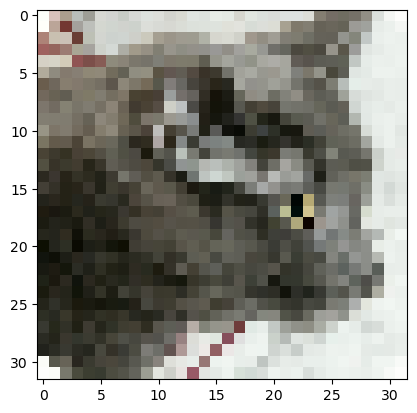

In [34]:
img = keras.utils.load_img(
    "PetImages/Cat/6779.jpg", target_size=image_size
)
plt.imshow(img)

img_array = keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = float(predictions[0])
print(f"This image is {100 * (1 - score):.2f}% cat and {100 * score:.2f}% dog.")


In a practical assessment, it could be helpful to examine the model: extract the features that were informative and see why they implied cat or dog.

## 4.1 The importance of Quality control: predicting TOR traffic

This cyber dataset is a) faster to run than the images, and b) demonstrates a very important **quality control** issue.

We will be using the following TOR data. This stands for The Onion Router - a way to "privately" visit websites without your Internet Service Provider being able to tell, because you route it through another server. The problem is a simple classification one: we try to predict from features of the data whether it has been routed by TOR.

The data are described here:

http://www.unb.ca/cic/research/datasets/tor.html

We are using the 18Mb csv file which is a summary of the traffic (there is a 22Gb raw dataset we won't touch).

Overview: https://www.unb.ca/cic/datasets/tor.html

One example analysis: https://www.analyticsvidhya.com/blog/2018/07/using-power-deep-learning-cyber-security/

This is the citation:

Arash Habibi Lashkari, Gerard Draper-Gil, Mohammad Saiful Islam Mamun and Ali A. Ghorbani, "Characterization of Tor Traffic Using Time Based Features", In the proceeding of the 3rd International Conference on Information System Security and Privacy, SCITEPRESS, Porto, Portugal, 2017.

We have extracted only a single file here, and password encrypted it. To access the rest of the documents, you need to agree to the T&Cs and download the files directly from UNB. (Which is free for academic use.)

### 4.1.1 Obtain the data

We have a local version of the data on the dsbristol github, as the website requires interactive downloading.

In [35]:
import requests

## Get the csv data
url = 'https://github.com/dsbristol/dst/blob/master/data/merged_5s.zip?raw=true'
r = requests.get(url, allow_redirects=True)
open('../data/merged_5s.zip', 'wb').write(r.content)

4391912

Programatically extract the data:

In [36]:
import os 
os.getcwd()

'/Users/madjl/teach/dst-private/Workshops'

In [37]:
from zipfile import ZipFile

with ZipFile('../data/merged_5s.zip') as zf:
    zf.extractall(pwd=b'dsbristol',path="../data/")

### 4.1.2 TOR data processing

On to the CSV file. We'll do the standard examination of the data.

In [38]:
import pandas as pd
df=pd.read_csv('../data/merged_5s.csv', sep=',')

In [39]:
df.head()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,...,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,10.0.2.15,53913,216.58.208.46,80,6,435,0.0,4597.701149,435.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
1,10.0.2.15,53913,216.58.208.46,80,6,259,0.0,7722.007722,259.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
2,10.0.2.15,53913,216.58.208.46,80,6,891,0.0,2244.668911,891.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
3,10.0.2.15,53913,216.58.208.46,80,6,1074,0.0,1862.197393,1074.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR
4,10.0.2.15,53913,216.58.208.46,80,6,315,0.0,6349.206349,315.0,0.0,...,0,0,0,0,0,0,0,0,0,nonTOR


In [40]:
df.describe()

,Source Port,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,...,Bwd IAT Max,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,84194.000000,84194.000000,84194.000000,8.419400e+04,8.419200e+04,8.419400e+04,8.419400e+04,8.419400e+04,8.419400e+04,8.419400e+04,...,8.419400e+04,8.419400e+04,8.419400e+04,84194.0,8.419400e+04,8.419400e+04,8.419400e+04,84194.0,8.419400e+04,8.419400e+04
mean,36548.661686,13160.683802,11.709041,1.976443e+06,inf,inf,2.345857e+05,1.060288e+05,5.085555e+05,1.692679e+05,...,2.699017e+05,3.730249e+04,1.879716e+04,0.0,1.879716e+04,1.879716e+04,1.585213e+05,0.0,1.585213e+05,1.585213e+05
std,21514.574423,19549.475949,5.496059,2.143432e+06,NaN,NaN,5.300413e+05,2.847677e+05,8.607729e+05,5.012712e+05,...,6.769662e+05,2.460999e+05,1.437066e+05,0.0,1.437066e+05,1.437066e+05,7.603776e+05,0.0,7.603776e+05,7.603776e+05
min,21.000000,21.000000,6.000000,0.000000e+00,0.000000e+00,4.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.255000e+03,...,0.000000e+00,-3.270000e+02,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
25%,15685.000000,137.000000,6.000000,1.110615e+05,1.068141e+02,4.874711e+00,9.873663e+03,0.000000e+00,3.537575e+04,1.900000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
50%,42381.000000,443.000000,17.000000,4.207625e+05,1.952058e+03,2.966216e+01,4.652450e+04,3.953863e+03,1.556870e+05,4.930000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
75%,54420.000000,19302.000000,17.000000,4.838636e+06,2.596406e+04,1.040035e+02,3.334988e+05,4.637779e+04,4.427632e+05,1.358822e+05,...,1.216798e+05,4.400000e+01,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
max,65534.000000,65514.000000,17.000000,5.000000e+06,inf,inf,5.000000e+06,3.535258e+06,5.000000e+06,5.000000e+06,...,4.998709e+06,4.998709e+06,2.447136e+06,0.0,2.447136e+06,2.447136e+06,5.000000e+06,0.0,5.000000e+06,5.000000e+06


In [41]:
df.shape

(84194, 29)

In [42]:
pd.crosstab(df.label,columns='label')

col_0,label
label,
TOR,14508
nonTOR,69686


### 4.1.3 Test/train split

We'll use 10-fold CV, but just run the training once for speed and simplicity. We will then remoe the columns that are not useful for prediction - here these are the IP addresses (computer identifiers) which we know from expert knowledge would be different in external datasets.

In [43]:
np.random.seed(7)
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,shuffle=True)
kfsplit=kf.split(df)
## We're going to extract out the "test" dataset from the first fold, to do our testing on
# kf.split returns an iterator, i.e. it creates a function that creates a test/split
# which we can either loop over or get the first using next
ninefolds,onefold=next(kfsplit) 
mydata=df.loc[ninefolds]
mytestdata=df.loc[onefold]

In [44]:
mydata.values[:,0:28]

array([['10.0.2.15', 53913, '216.58.208.46', ..., 0, 0, 0],
       ['10.0.2.15', 53913, '216.58.208.46', ..., 0, 0, 0],
       ['10.0.2.15', 53913, '216.58.208.46', ..., 0, 0, 0],
       ...,
       ['131.202.240.87', 11365, '31.13.73.1', ..., 0, 0, 0],
       ['10.0.2.15', 51024, '37.97.149.8', ..., 0, 0, 0],
       ['131.202.6.26', 13000, '131.202.240.87', ..., 0, 0, 0]],
      dtype=object)

In [45]:
## This function is useful for establishing which elements in an array are true
## It is a port of the R function of the same name
def which(self):
    try:
        self = list(iter(self))
    except TypeError as e:
        raise Exception("""'which' method can only be applied to iterables.
        {}""".format(str(e)))
    indices = [i for i, x in enumerate(self) if bool(x) == True]
    return(indices)

In [46]:
## Extract out the columns for which we'll do learning
torcols=which(mydata.apply(pd.Series.nunique) != 1) 
# list(range(0,mydata.shape[1]-1)) # We need to remove: IP addresses, and constant columns
torcols.pop(2) # Remove Dest IP 
torcols.pop(0) # Remove Source IP
torcols.pop()  # Remove Tor/NonTor label

traindata = mydata[mydata.columns[torcols]].copy()
testdata  = mytestdata[mytestdata.columns[torcols]].copy()

## 4.2 First try: Run the neural network on the data

### 4.2.1 Running with the data as-is
 
First we will try a simple extraction function for the data.

In [47]:
## Extract the labels:
def myextractY(data):
    ## Extract the Tor/nonTor data as 0/1 values
    TorYfactor=pd.factorize(data)
    TorY=TorYfactor[0] # Keep ToyYfactor around to know which is which
    return(TorY,TorYfactor[1])

TorY,TorYnames=myextractY(mydata.values[:,mydata.shape[1]-1])
testTorY,testTorYnames=myextractY(mytestdata.values[:,mytestdata.shape[1]-1])

In [48]:
## Examine the Y values
pd.crosstab(TorY,columns='label')

col_0,label
row_0,
0,62747
1,13027


### 4.2.2 An example of failure

Neural network code will enthusiastically proceed even if there is something wrong.

Here, we procude the data to the model "as is" without any sanitisation.

It will not work, but it will run....

In [49]:
TorX=traindata.values
testTorX=testdata.values

In [50]:
## Define a model
tormodel = Sequential()
tormodel.add(Dense(24, input_dim=TorX.shape[1], activation='relu'))
tormodel.add(Dense(TorX.shape[1], activation='relu'))
tormodel.add(Dense(1, activation='sigmoid'))
tormodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
tormodel.fit(TorX, TorY, epochs=1, batch_size=100)

758/758 [==============================] - 5s 6ms/step - loss: nan - accuracy: 0.8154


In [52]:
torscores = tormodel.evaluate(TorX, TorY)
print("\n%s: %.2f%%" % (tormodel.metrics_names[1], torscores[1]*100))

2368/2368 [==============================] - 9s 4ms/step - loss: nan - accuracy: 0.8281

accuracy: 82.81%


In [53]:
testtorscores = tormodel.evaluate(testTorX, testTorY)
print("\n%s: %.2f%%" % (tormodel.metrics_names[1], testtorscores[1]*100))

264/264 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.8241

accuracy: 82.41%


We get `nan` loss functions. This is a problem!

## 4.3 A full analysis of the TOR data

### 4.3.1 EDA of the input data

We'll first examine what the data is doing.

You have to be careful because several functions replace NA and infinite values stealthily...

In [54]:
pd.crosstab(mydata.values[:,0],columns="Flow Bytes/s").describe()

col_0,Flow Bytes/s
count,723.000000
mean,104.804979
std,680.466092
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,9410.000000


Whereas others reveal these issues

In [55]:
traindata.describe()

,Source Port,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,...,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Active Mean,Active Max,Active Min,Idle Mean,Idle Max,Idle Min
count,75774.000000,75774.000000,75774.000000,7.577400e+04,7.577300e+04,7.577400e+04,7.577400e+04,7.577400e+04,7.577400e+04,7.577400e+04,...,7.577400e+04,7.577400e+04,7.577400e+04,7.577400e+04,7.577400e+04,7.577400e+04,7.577400e+04,7.577400e+04,7.577400e+04,7.577400e+04
mean,36532.521907,13177.342532,11.712236,1.978014e+06,inf,inf,2.351684e+05,1.064205e+05,5.094632e+05,1.695085e+05,...,8.379887e+04,6.905067e+04,2.699219e+05,3.764953e+04,1.886616e+04,1.886616e+04,1.886616e+04,1.589255e+05,1.589255e+05,1.589255e+05
std,21519.282571,19552.182719,5.495940,2.143870e+06,NaN,NaN,5.320558e+05,2.856581e+05,8.620820e+05,5.030740e+05,...,3.004874e+05,2.405442e+05,6.765167e+05,2.470756e+05,1.441334e+05,1.441334e+05,1.441334e+05,7.614742e+05,7.614742e+05,7.614742e+05
min,21.000000,21.000000,6.000000,0.000000e+00,0.000000e+00,4.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.255000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,-2.920000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,15685.000000,137.000000,6.000000,1.112895e+05,1.068075e+02,4.874556e+00,9.861800e+03,0.000000e+00,3.542925e+04,1.900000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,42400.500000,443.000000,17.000000,4.207900e+05,1.951160e+03,2.951255e+01,4.673320e+04,3.956463e+03,1.562140e+05,5.030000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,54420.000000,19302.000000,17.000000,4.838806e+06,2.606413e+04,1.044180e+02,3.341669e+05,4.645039e+04,4.443960e+05,1.360875e+05,...,2.007479e+04,1.895921e+04,1.216472e+05,4.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65534.000000,65514.000000,17.000000,5.000000e+06,inf,inf,5.000000e+06,3.535137e+06,5.000000e+06,5.000000e+06,...,4.998709e+06,3.510259e+06,4.998709e+06,4.998709e+06,2.447136e+06,2.447136e+06,2.447136e+06,5.000000e+06,5.000000e+06,5.000000e+06


You may get NA's, or you may get a very suspicious answer.

In [56]:
## Check how many IPs we are dealing with
pd.crosstab(mydata.values[:,0],columns="Source IP").describe()

col_0,Source IP
count,723.000000
mean,104.804979
std,680.466092
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,9410.000000


### SUPER IMPORTANT: Floating point fragility

* The GPU version of tensorflow works with 32 bit floats. 
* The CPU (by default; see ~/.keras/keras.json) works with 64 bit floats.
* This is important because **your code may run fine on a 64 bit CPU but return NAN on a GPU**.

How to access these values:

In [57]:
[np.finfo(np.float32).max, np.finfo(np.float64).max]

[3.4028235e+38, 1.7976931348623157e+308]

In [58]:
mydata.max()

Source IP             99.243.125.41
 Source Port                  65534
 Destination IP       99.94.171.150
 Destination Port             65514
 Protocol                        17
 Flow Duration              5000000
 Flow Bytes/s                   inf
 Flow Packets/s                 inf
 Flow IAT Mean            5000000.0
 Flow IAT Std        3535136.511922
 Flow IAT Max               5000000
 Flow IAT Min               5000000
Fwd IAT Mean              5000000.0
 Fwd IAT Std          3534671.23566
 Fwd IAT Max                5000000
 Fwd IAT Min                5000000
Bwd IAT Mean              4998709.0
 Bwd IAT Std         3510259.081146
 Bwd IAT Max                4998709
 Bwd IAT Min                4998709
Active Mean                 2447136
 Active Std                       0
 Active Max                 2447136
 Active Min                 2447136
Idle Mean                   5000000
 Idle Std                         0
 Idle Max                   5000000
 Idle Min                   

#### Tricks with NA's

In this example, this may not be needed (may be for GPU usage). There can be no missing or non-finite values in the data.

```python
traindata.replace([np.inf, -np.inf], np.nan); # replace all non-finite values with missing
traindata=traindata.apply(pd.to_numeric, errors='coerce') ## coerce the data
traindata=traindata.fillna(0) ## Or fill it with 0's
```

This is SUPPOSED to work, and does in a simple example:

In [59]:
import pandas as pd
import numpy as np
df = pd.DataFrame([1000, 2000, 3000, -4000, np.inf, -np.inf])
print("Original DataFrame:")
print(df)
print("Removing infinite values:")
df = df.replace([np.inf, -np.inf], np.nan)
print(df)

Original DataFrame:
        0
0  1000.0
1  2000.0
2  3000.0
3 -4000.0
4     inf
5    -inf
Removing infinite values:
        0
0  1000.0
1  2000.0
2  3000.0
3 -4000.0
4     NaN
5     NaN


Applied to our data, it is not clear what value to use. We're replacing with zero for now.

In [61]:
traindata2 = mydata[mydata.columns[torcols]].copy()
traindata2=traindata2.astype(float)
traindata2=traindata2.replace([np.inf, -np.inf], np.nan) 
traindata2.fillna(0, inplace=True)

testdata2  = mytestdata[mytestdata.columns[torcols]].copy()
testdata2=testdata2.astype(float)
testdata2=traindata2.replace([np.inf, -np.inf], np.nan) 
testdata2.fillna(0, inplace=True)
TorX2=traindata2.values
testTorX2=testdata2.values

In [62]:
traindata2.describe()

,Source Port,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,...,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Active Mean,Active Max,Active Min,Idle Mean,Idle Max,Idle Min
count,75774.000000,75774.000000,75774.000000,7.577400e+04,7.577400e+04,7.577400e+04,7.577400e+04,7.577400e+04,7.577400e+04,7.577400e+04,...,7.577400e+04,7.577400e+04,7.577400e+04,7.577400e+04,7.577400e+04,7.577400e+04,7.577400e+04,7.577400e+04,7.577400e+04,7.577400e+04
mean,36532.521907,13177.342532,11.712236,1.978014e+06,2.682878e+05,2.772251e+03,2.351684e+05,1.064205e+05,5.094632e+05,1.695085e+05,...,8.379887e+04,6.905067e+04,2.699219e+05,3.764953e+04,1.886616e+04,1.886616e+04,1.886616e+04,1.589255e+05,1.589255e+05,1.589255e+05
std,21519.282571,19552.182719,5.495940,2.143870e+06,5.046474e+06,4.362493e+04,5.320558e+05,2.856581e+05,8.620820e+05,5.030740e+05,...,3.004874e+05,2.405442e+05,6.765167e+05,2.470756e+05,1.441334e+05,1.441334e+05,1.441334e+05,7.614742e+05,7.614742e+05,7.614742e+05
min,21.000000,21.000000,6.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.255000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,-2.920000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,15685.000000,137.000000,6.000000,1.112895e+05,1.068070e+02,4.874530e+00,9.861800e+03,0.000000e+00,3.542925e+04,1.900000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,42400.500000,443.000000,17.000000,4.207900e+05,1.950917e+03,2.950236e+01,4.673320e+04,3.956463e+03,1.562140e+05,5.030000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,54420.000000,19302.000000,17.000000,4.838806e+06,2.606058e+04,1.044057e+02,3.341669e+05,4.645039e+04,4.443960e+05,1.360875e+05,...,2.007479e+04,1.895921e+04,1.216472e+05,4.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65534.000000,65514.000000,17.000000,5.000000e+06,6.000000e+08,3.000000e+06,5.000000e+06,3.535137e+06,5.000000e+06,5.000000e+06,...,4.998709e+06,3.510259e+06,4.998709e+06,4.998709e+06,2.447136e+06,2.447136e+06,2.447136e+06,5.000000e+06,5.000000e+06,5.000000e+06


In [63]:
## Define a model
tormodel2 = Sequential()
tormodel2.add(Dense(24, input_dim=TorX.shape[1], activation='relu'))
tormodel2.add(Dense(TorX.shape[1], activation='relu'))
tormodel2.add(Dense(1, activation='sigmoid'))
tormodel2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [64]:
tormodel2.fit(TorX2, TorY, epochs=1, batch_size=100)

758/758 [==============================] - 5s 6ms/step - loss: 7693.2646 - accuracy: 0.8078


The nan loss is fixed. We didn't run it long enough to expect a good answer.

### 4.3.2 Best practice data processing for the TOR data

The above process is ad-hoc and does not treat columns equally. It is better practice to properly scale the data for input.

Here we define a pre-processing pipeline where we threshold the data. Note that we keep the scaling that was run on the training data for proper scaling of the test data!

In [71]:
## This section defines a preprocessing function that should ensure that data can be used on a GPU. 
## Note that in practice, the data may be multiplied by some other number meaning that all "large"
## values can produce NaN values!

from sklearn import preprocessing
## Extract the feature data
from sklearn.preprocessing import StandardScaler

def mypreprocess(data,scaling=None):
    data=data.astype(float)
    data[np.where(data >= np.finfo(np.float32).max)] = np.finfo(np.float32).max
    data[np.where(data <= np.finfo(np.float32).min)] = np.finfo(np.float32).min
    np.nan_to_num(data)
    if(scaling == None):
        scaling = StandardScaler()
        datat=scaling.fit_transform(data)
    else:
        datat=scaling.transform(data)
    datat[np.where(datat > 10)]=10
    datat[np.where(datat < -10)]=-10
    return(datat,scaling)

Now we apply the transformation to the training and test data:

In [72]:
traindata=traindata.fillna(0)
## Scale the training data
TorXscaled, scaling = mypreprocess(traindata.values)
TorY,TorYnames=myextractY(mydata.values[:,mydata.shape[1]-1])

In [73]:
testdata=testdata.fillna(0)
## Scale the test data
testTorXscaled, testscaling = mypreprocess(testdata.values,scaling)
testTorY,testTorYnames=myextractY(testdata.values[:,testdata.shape[1]-1])

In [74]:
## Check that we are scaling identically in both datasets
print(testscaling.mean_ - scaling.mean_)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [75]:
pd.DataFrame(TorXscaled).max().head()

0     1.347706
1     2.676786
2     0.962128
3     1.409603
4    10.000000
dtype: float64

In [76]:
## Some checks you might choose to do
#np.where(TorX <= -np.finfo(np.float32).max)
#np.isnan(TorXscaled.any())

### 4.3.3 Running the NN TOR model model

Here we run the model on the rescaled data.

Once you have this working, try setting batch_size to different values, adding new layers, and changing the number of nodes in the first layer, changing the optimizer, etc.


In [77]:
scaledtormodel = Sequential()
scaledtormodel.add(Dense(24, input_dim=TorXscaled.shape[1], activation='relu'))
scaledtormodel.add(Dense(TorXscaled.shape[1], activation='relu'))
scaledtormodel.add(Dense(1, activation='sigmoid'))
scaledtormodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [78]:
scaledtormodel.fit(TorXscaled, TorY, epochs=25, batch_size=100)

Epoch 1/25
758/758 [==============================] - 4s 5ms/step - loss: 0.2814 - accuracy: 0.8821
Epoch 2/25
758/758 [==============================] - 4s 5ms/step - loss: 0.2079 - accuracy: 0.9159
Epoch 3/25
758/758 [==============================] - 4s 5ms/step - loss: 0.2126 - accuracy: 0.9170
Epoch 4/25
758/758 [==============================] - 4s 5ms/step - loss: 0.2192 - accuracy: 0.9175
Epoch 5/25
758/758 [==============================] - 4s 5ms/step - loss: 0.2411 - accuracy: 0.9155
Epoch 6/25
758/758 [==============================] - 4s 5ms/step - loss: 0.2576 - accuracy: 0.9130
Epoch 7/25
758/758 [==============================] - 4s 5ms/step - loss: 0.2751 - accuracy: 0.9108
Epoch 8/25
758/758 [==============================] - 4s 5ms/step - loss: 0.2929 - accuracy: 0.9089
Epoch 9/25
758/758 [==============================] - 4s 5ms/step - loss: 0.3235 - accuracy: 0.9032
Epoch 10/25
758/758 [==============================] - 4s 5ms/step - loss: 0.3444 - accuracy: 0.9005

In [79]:
# evaluate the model
scaledtorscores = scaledtormodel.evaluate(TorXscaled, TorY)
print("\n%s: %.2f%%" % (scaledtormodel.metrics_names[1], scaledtorscores[1]*100))

2368/2368 [==============================] - 8s 3ms/step - loss: 0.9884 - accuracy: 0.8321

accuracy: 83.21%


In [80]:
# evaluate the model
testscaledtorscores = scaledtormodel.evaluate(testTorXscaled, testTorY)
print("\n%s: %.2f%%" % (scaledtormodel.metrics_names[1], testscaledtorscores[1]*100))

264/264 [==============================] - 1s 4ms/step - loss: -73.8062 - accuracy: 0.8190

accuracy: 81.90%


### QUESTION: What is going on here?

Can you improve performance by changing:

* layer type
* Learning procedure
* Inference duration
* Number of layers
* Number of nodes in each layer
* Data pre-processing?

In [81]:
scaledtormodel = Sequential()
scaledtormodel.add(Dense(24, input_dim=TorXscaled.shape[1], activation='relu'))
scaledtormodel.add(Dense(TorXscaled.shape[1], activation='relu'))
scaledtormodel.add(Dense(1, activation='sigmoid'))
scaledtormodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [82]:
epochs=list()
trainacc=list()
testacc=list()
deltaepochs=5
eon=0
for i in range(0,5) : 
        print("epoch : " + str(eon))
        scaledtormodel.fit(TorXscaled, TorY, epochs=deltaepochs, batch_size=100)
        scaledtorscores = scaledtormodel.evaluate(TorXscaled, TorY)
        testscaledtorscores = scaledtormodel.evaluate(testTorXscaled, testTorY)
        eon+=deltaepochs
        epochs.append(eon)
        trainacc.append(scaledtorscores[1])
        testacc.append(testscaledtorscores[1])

epoch : 0
Epoch 1/5
758/758 [==============================] - 4s 5ms/step - loss: 0.2840 - accuracy: 0.8987
Epoch 2/5
758/758 [==============================] - 4s 5ms/step - loss: 0.2143 - accuracy: 0.9173
Epoch 3/5
758/758 [==============================] - 4s 5ms/step - loss: 0.2253 - accuracy: 0.9168
Epoch 4/5
758/758 [==============================] - 4s 5ms/step - loss: 0.2346 - accuracy: 0.9171
Epoch 5/5
264/264 [==============================] - 1s 3ms/step - loss: 158.4702 - accuracy: 0.8165
epoch : 5
Epoch 1/5
758/758 [==============================] - 4s 5ms/step - loss: 0.2904 - accuracy: 0.9102
Epoch 2/5
758/758 [==============================] - 4s 5ms/step - loss: 0.2966 - accuracy: 0.9092
Epoch 3/5
758/758 [==============================] - 4s 5ms/step - loss: 0.3307 - accuracy: 0.9079
Epoch 4/5
758/758 [==============================] - 4s 5ms/step - loss: 0.3645 - accuracy: 0.9029
Epoch 5/5
264/264 [==============================] - 1s 3ms/step - loss: 150.9296 - acc

In [83]:
results=[epochs,
        trainacc,
        testacc]

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

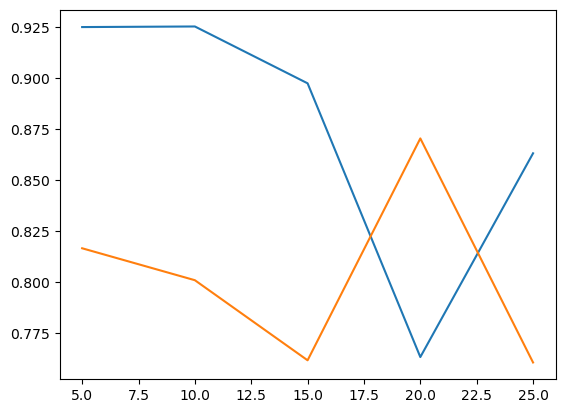

In [85]:
plt.plot(epochs,trainacc,label='training accuracy')
plt.plot(epochs,testacc,label='training accuracy')
plt.show()